# Recruit Restaurant Visitor Forecasting

sbmissionの日付の要素(曜日)（祝日）  
が一定の割合になるように抽出された日付（曜日）をtrainから抽出して学習。**トレンドを反映させたい **   
いくつ？数はなるべく多く。  
その店舗のその日の、来客者数を予想。

trainをモデルに入れて、その店舗の**その曜日**の、来客者数を返して欲しい。  
だからまずsubmissionのdateを抽象化する。数はもちろん変えない。属性分類してそれぞれの割合を出す。  
trainもむりくり同様の属性分類をする。
その割合と店舗数分、trainデータから曜日を引っ張ってきて学習する。
___

Workflowとして[**CRISP-DM**](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining)を意識します。  
データ分析プロジェクトにおいて、どの業界に対しても共通となるフェーズを定義したCRISP-DM（CRoss-Industry Standard Process for Data Mining）という考え方があります。  
以下がそのイメージ画像になります。  

![CRISP-DM](https://camo.qiitausercontent.com/a0ff49d818c993d1141aacd782745085e3d07d88/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3134383133362f38653030633036362d363734352d373939342d303737352d6538376663656234626433302e706e67)

データ分析する上で、まず**ビジネス（課題）の理解**から始まります。解決すべき課題を定義したら次に、**データの理解**となります。設定した課題を解決できるだけのデータがあるかどうかを見ます。  

データがあれば**データの準備**に移ります。ここで、先述のデータクレンジング等予測モデルを作る準備をします。データがない場合、必要なデータを収集するか課題を設定し直すことになります。  

予測モデル作成の準備が出来たら**モデル作成、モデル評価（改善）**をします。作成したモデルの予測精度が良ければ**デプロイ、納品**となります。注意すべきは、作成、改善したモデルの精度が常に良くなるとは限らないということです。  

モデルの精度が良くならない場合、再度、ビジネス理解のフェーズに戻り、課題設定からやり直します。  

## Business Understanding

今回のビジネスの目的は、与えられたデータから**将来何人のレストランを訪れるかを予測する**ということです。  

以下に、このコンペティションの概要を紹介いたします。
___
レストランでは、効果的に原料を購入し、スタッフをスケジュールするために、どれくらいの数の顧客が毎日訪れるかを予想する必要があります。  

今回の情報提供者Recruit Holdingsは、将来の顧客予測を可能にする重要なデータセットの独自の情報網を持っています。  
具体的には、Recruit Holdingsは、レストランPepper Gourmet（レストランレビューサービス）、AirREGI（レストラン営業ポイント）、レストランボード（予約ログ管理ソフトウェア）を所有しています。  

このコンテストでは、予約や訪問データを使用して、将来の日付にレストランの訪問者の総数を予測することに挑戦しています。

この情報は、レストランがより効率的になり、顧客が楽しいダイニング体験を作成できるようにするのに役立ちます。  
___  
こちらは要約ですので、より具体的な原文は[こちら](https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting)のコンペサイトで確認することができます。  

___
評価関数と提出形式の確認をいたします。
提出物は、RMSLE(平方平均二乗対数誤差)で評価されます。  

提出ファイルはidとvisitorsの情報を提出するようです。  
Data Understanding (EDA)の項目で深く理解することにしましょう。  
[こちらのページ](https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting#evaluation)がその詳細になります。  


## Data Understanding (EDA)

設定した課題を解決できるだけのデータがあるかどうかを見ます。    

データの概要は[コンペサイト](https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting/data)からも確認できます  

特に、一番下の欄はそれぞれのデータの中身をみることができます。


___
まずデータの概要をコンペサイトよりまとめます  

このコンペでは、レストラン訪問者を中心とした時系列予測問題が提供されます。データは2つの別々のサイトから得られます  

これらのサイトからの予約、訪問、およびその他の情報を使用して、指定された日付に将来のレストラン訪問者合計を予測する必要があります。トレーニングデータには、2016年から2017年の時系列データが含まれます。  

テストセットは、2017年の4月と5月の最終週をカバーしています。テストセットは、時間に基づいて分割されます（公開フォールドが最初に、次にプライベートフォールドが分割されます）。そして、空港レストランの選択されたサブセットをカバーします。テストセットは意図的に日本では「ゴールデンウィーク」と呼ばれる休日の週に及ぶことに注意してください。


___
次に与えられているcsvファイルをそれぞれ理解します。  
それに伴い、Columnの意味も理解します。  

- air_reserve.csv     
このファイルには、air(AirREGI)システムで行われた予約が含まれています。  
air_store_id - airシステム内でのレストランのID  
visit_datetime - 指定された予約時間  
reserve_datetime - 予約を受け付けた時間  
reserve_visitors - 予約人数  
>
- hpg_reserve.csv    
このファイルには、hpg(Hot Pepper Gourmet)システムで行われた予約が含まれています。  
hpg_store_id - hpgシステムでのレストランID  
visit_datetime - 指定された予約時間  
reserve_datetime - 予約を受け付けた時間  
reserve_visitors - 予約人数  
>
- air_store_info.csv  
このファイルには、選択されたairレストランに関する情報が含まれています。Columnの名前と内容は自明です。  
air_store_id  
air_genre_name - ジャンル  
air_area_name   
latitude - 緯度  
longitude - 経度  
(補足) : 緯度と経度は、店舗が属する地域の緯度と経度です
>
- hpg_store_info.csv  
このファイルには、選択したhpgレストランに関する情報が含まれています。  
hpg_store_id  
hpg_genre_name  
hpg_area_name  
latitude  
longitude  
>
- store_id_relation.csv  
このファイルを使用すると、airとhpgシステムの両方のIDを持つレストランを確認できます。  
hpg_store_id  
air_store_id  
>
- air_visit_data.csv  
このファイルには、airレストランの履歴データが含まれています。  
air_store_id  
visit_date  
visitors - その日付の時のレストランへの訪問者の数
>
- sample_submission.csv  
このファイルは、予測しなければならない日数を含め、正しい形式での提出サンプルです。    
id - air_store_id と visit_dateで連結されたIDです  
visitors- 店舗と日付の組み合わせについて予測される訪問者の数  
>
- date_info.csv   
このファイルは、データセット内のカレンダー日付に関する基本情報を提供します  
calendar_date  
day_of_week  
holiday_flg - is the day a holiday in Japan  
>

___

  ***Note***  
  
・**トレンドのある時系列を扱う**。submissionするための予測期間がゴールデンウィークが含まれるため、祝日も意識した学習が重要。  
また、submissionの指定した範囲に応じたpredictをする必要がある。

・**trainデータの生成が必要**単純なtrainデータセットと言えるものがない。  
・submissionするためにそれぞれのcsvからデータを取ってくる必要がある(air_reserve.csvとair_visit_data.csv)  
・したがってデータをモデルに入れるための前処理も多く必要。
  

・予約したけども来てない人や、予約しなくても来客する人もいる

・air_visit_data.csvはあるのにhpg_visit_data.csvというのはない。hpgでの実際の来客者数の完全な把握はできない。  
・この問題はstore_id_relation.csvを用いて、airと同じIDをもつ店舗については把握可能。

・予約者のIDの情報は無い。予約した人が訪れたのかどうか判定する術がないということ。

・これは私が飲食店で働いていた頃のことですが、天候によって来客数の変化があるため、それも考慮したいですね。

>
・少し理解に苦しむのがsample_submission.csvの「id」。  
コンペサイトの説明は「**the id is formed by concatenating the air_store_id and visit_date** with an underscore」とある  
つまりcsvファイルは分かれてるけどそれらを合算して使うということでしょう。

  ***Next do ***   
まずやりたいことは、Target変数の確認です。  
その次はtrainデータセットの作成になるでしょう。

___


### Setting Imports

In [0]:
# pandas and numpy for data manipulation
import numpy as np
import pandas as pd 

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
# from sklearn.preprocessing import LabelEncoder

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# pd.DataFrame型のprint用 (例) display(df.head(), df.tail())
from IPython.display import display

In [0]:
# pandasのデータの表示
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_row', 15)

### Read in Data 

submissionの確認をします。  
それによってどういったtrainデータを作るかを考えたいと思います。

In [10]:
air_reserve = pd.read_csv('air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
hpg_reserve = pd.read_csv('hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
# parse_dates=　はdatetime型で読み込むcolumn名（リストや辞書）

air_store_info = pd.read_csv('air_store_info.csv')
hpg_store_info = pd.read_csv('hpg_store_info.csv')

store_relation = pd.read_csv('store_id_relation.csv')

date_info = pd.read_csv('date_info.csv',parse_dates=['calendar_date'])

air_visit = pd.read_csv('air_visit_data.csv',parse_dates=['visit_date'])

sample_submission = pd.read_csv('sample_submission.csv')


print("air_reserve rows and columns :               ", air_reserve.shape)
print("hpg_reserve rows and columns :             ", hpg_reserve.shape)
print("air_store_info rows and columns :          ", air_store_info.shape)
print("hpg_store_info rows and columns :        ", hpg_store_info.shape)
print("store_relation rows and columns :          ", store_relation.shape)
print("date_info rows and columns :                  ", date_info.shape)
print("air_visit rows and columns :                     ", air_visit.shape)
print("sample_submission rows and columns : ", sample_submission.shape)

air_reserve rows and columns :                (92378, 4)
hpg_reserve rows and columns :              (2000320, 4)
air_store_info rows and columns :           (829, 5)
hpg_store_info rows and columns :         (4690, 5)
store_relation rows and columns :           (150, 2)
date_info rows and columns :                   (517, 3)
air_visit rows and columns :                      (252108, 3)
sample_submission rows and columns :  (32019, 2)


### Snapshot

簡単にデータの中身を確認しましょう。  
csvファイルの説明より中身を直接見ると理解が深まります

In [11]:
air_reserve.head(2) #all the air stores booking data

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3


In [12]:
hpg_reserve.head(2) #all the hpg stores booking data

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3


In [13]:
air_store_info.head(2) #description of air stores

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852


In [14]:
hpg_store_info.head(2) #description of hpg stores

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [15]:
air_visit.head(2) #historical visits for air stores

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32


In [16]:
date_info.head(2) 

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1


In [17]:
store_relation.head(2) #hpg store to air store mapping

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809


In [18]:
sample_submission.head(2) #air id and date is merged together

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0


---

  ***Note ***   
  
・**お店のID単位**に学習を行いたい。つまりID(お店)を一つの特徴量として考える。  
・同様に日付の**曜日(祝日等)を考慮**した特徴量を生成したい。  
・予約ではhourまで表示されているが、日時までで良い。**単位を揃える**  
・air_area_nameを特徴量として
>
・日付について。これはgoogle検索をして得た情報ですが  
2017年は4/29(土)~5/5(金)までゴールデンウィーク。  
~~その後、土日が続くのでこの年は７連休だったんですね素敵！~~  
2016年は4月29日から5月8日です[参考先](http://first-rg.net/gw/)  
~~この年に至っては１０連休です。もはや海外行きそう。~~

  ***Next do ***
  
trainデータの生成および前処理

## Data Preparation

### Make Train Data

trainデータとなるデータフレームの生成と、データの整形を行なっていきます。  

先にTargetを見たように、'店' '曜日' '祝日' を構成させます。

つまり、train_dfには'air_store_id' 'day_of_week' 'holiday_flg'
この三つの特徴量を持つようにします。  

これらの情報を持つcsvから特徴量を引っ張ってきましょう。

つまり、date_info.csv と air_visit_date.csvをmergeしましょう

In [19]:
date_info = pd.read_csv("date_info.csv")
date_info.head(3)

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1


In [21]:
air_visit.head(3)

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29


In [0]:
# 日付のカラム名を揃える
date_info = date_info.rename(columns={'calendar_date': 'date'})
air_visit = air_visit.rename(columns={'visit_date': 'date'})

In [0]:
train_df = pd.merge(air_visit, date_info, how='left', on='date')

In [25]:
train_df.head(3)

,air_store_id,date,visitors,day_of_week,holiday_flg
0,air_ba937bf13d40fb24,2016-01-13 00:00:00,25,NaN,NaN
1,air_ba937bf13d40fb24,2016-01-14 00:00:00,32,NaN,NaN
2,air_ba937bf13d40fb24,2016-01-15 00:00:00,29,NaN,NaN


これらを数値データに直します

In [0]:
one_hot = pd.get_dummies(train_df['day_of_week'])
train_df = train_df.join(one_hot)
train_df = train_df.drop('day_of_week',axis=1)

In [27]:
train_df.head(7)

,air_store_id,date,visitors,holiday_flg
0,air_ba937bf13d40fb24,2016-01-13 00:00:00,25,NaN
1,air_ba937bf13d40fb24,2016-01-14 00:00:00,32,NaN
2,air_ba937bf13d40fb24,2016-01-15 00:00:00,29,NaN
3,air_ba937bf13d40fb24,2016-01-16 00:00:00,22,NaN
4,air_ba937bf13d40fb24,2016-01-18 00:00:00,6,NaN
5,air_ba937bf13d40fb24,2016-01-19 00:00:00,9,NaN
6,air_ba937bf13d40fb24,2016-01-20 00:00:00,31,NaN


In [0]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['date_year'] = train_df['date'].dt.year
train_df['date_month'] = train_df['date'].dt.month
train_df['date_day'] = train_df['date'].dt.day
train_df = train_df.drop('date',axis=1)

In [29]:
train_df.head(7)

,air_store_id,visitors,holiday_flg,date_year,date_month,date_day
0,air_ba937bf13d40fb24,25,NaN,2016,1,13
1,air_ba937bf13d40fb24,32,NaN,2016,1,14
2,air_ba937bf13d40fb24,29,NaN,2016,1,15
3,air_ba937bf13d40fb24,22,NaN,2016,1,16
4,air_ba937bf13d40fb24,6,NaN,2016,1,18
5,air_ba937bf13d40fb24,9,NaN,2016,1,19
6,air_ba937bf13d40fb24,31,NaN,2016,1,20


最後にお店のIDを数値化しますが、  
testデータフレームを作るとき、同じIDは対応するさせたい為これは  
後で行うことにいたします。

これで、店名、日付、来客数、曜日、祝日のデータフレームができましたね。  
ここまでを改めてまとめると、trainデータにおける  
説明変数がーair_store_id、date、day_of_week、day_of_week  
目的変数がー来客数  
です。

これが機械学習のモデルにfitさせるデータになります。
___

### Make Test Data

submissionのデータからtestデータフレームを作ります  
trainデータフレームと同じ単位になるように揃えましょう。

In [30]:
sample_submission.head(3)

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0


ここの 'id' から店名と日付を分けて抽出しましょう。

In [0]:
# 店名を抜き出す
air_store_id = ['_'.join(id.split('_')[:2]) for id in sample_submission['id']]

# 日付を抜き出す
date = [id.split('_')[2] for id in sample_submission['id']]

In [32]:
test_df = pd.DataFrame({'air_store_id': air_store_id, 'date': date})
test_df.head(3)

,air_store_id,date
0,air_00a91d42b08b08d9,2017-04-23
1,air_00a91d42b08b08d9,2017-04-24
2,air_00a91d42b08b08d9,2017-04-25


さらに、曜日と祝日の情報を付与します

In [33]:
# 曜日と祝日の情報を付与
test_df = pd.merge(test_df, date_info, how='left', on='date')
test_df.head(3)

,air_store_id,date,day_of_week,holiday_flg
0,air_00a91d42b08b08d9,2017-04-23,Sunday,0
1,air_00a91d42b08b08d9,2017-04-24,Monday,0
2,air_00a91d42b08b08d9,2017-04-25,Tuesday,0


これらを数値データに直します

In [0]:
one_hot = pd.get_dummies(test_df['day_of_week'])
test_df = test_df.join(one_hot)
test_df = test_df.drop('day_of_week',axis=1)

In [35]:
test_df.head(7)

,air_store_id,date,holiday_flg,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,air_00a91d42b08b08d9,2017-04-23,0,0,0,0,1,0,0,0
1,air_00a91d42b08b08d9,2017-04-24,0,0,1,0,0,0,0,0
2,air_00a91d42b08b08d9,2017-04-25,0,0,0,0,0,0,1,0
3,air_00a91d42b08b08d9,2017-04-26,0,0,0,0,0,0,0,1
4,air_00a91d42b08b08d9,2017-04-27,0,0,0,0,0,1,0,0
5,air_00a91d42b08b08d9,2017-04-28,0,1,0,0,0,0,0,0
6,air_00a91d42b08b08d9,2017-04-29,1,0,0,1,0,0,0,0


In [0]:
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['date_year'] = test_df['date'].dt.year
test_df['date_month'] = test_df['date'].dt.month
test_df['date_day'] = test_df['date'].dt.day
test_df = test_df.drop('date',axis=1)

In [37]:
test_df.head(7)

,air_store_id,holiday_flg,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,date_year,date_month,date_day
0,air_00a91d42b08b08d9,0,0,0,0,1,0,0,0,2017,4,23
1,air_00a91d42b08b08d9,0,0,1,0,0,0,0,0,2017,4,24
2,air_00a91d42b08b08d9,0,0,0,0,0,0,1,0,2017,4,25
3,air_00a91d42b08b08d9,0,0,0,0,0,0,0,1,2017,4,26
4,air_00a91d42b08b08d9,0,0,0,0,0,1,0,0,2017,4,27
5,air_00a91d42b08b08d9,0,1,0,0,0,0,0,0,2017,4,28
6,air_00a91d42b08b08d9,1,0,0,1,0,0,0,0,2017,4,29


testデータフレームの用意ができました。  
これが機械学習のモデルに**最終的に**predictさせるデータになります。  
___
さて、まだIDの数値化を行なっていませんでしたね。  
trainデータフレームもここで変換させます  
まずtestデータから処理します

In [0]:
# testデータのair_store_idを保存し、後でtrainに適応させる
air_store_id = []

for i in test_df['air_store_id'].unique():
  air_store_id += [i]

In [0]:
# IDを処理する(test)
for index, name in enumerate(air_store_id):
  test_df.replace(name, index, inplace = True)

In [0]:
# 型を直す
test_df = test_df.astype('int64')

In [0]:
# ここまでの処理を保存しておく「
test_df.to_csv('test_df.csv')

trainの処理をします

In [0]:
train_df = pd.merge(train_df, pd.DataFrame(air_store_id, columns=["air_store_id"]), 
                                    how='inner', on='air_store_id')

In [0]:
# IDを処理する(train)
for index, name in enumerate(air_store_id):
  train_df.replace(name, index, inplace = True)

In [0]:
# 型を直す
train_df = train_df.astype('int64')

In [0]:
train_df.to_csv('train_df.csv')

## とりあえず回すテスト

train_dfを目的変数と説明変数に分けます

日程の指定

In [0]:
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

In [0]:
train_df_4 = train_df[train_df['date_month'] == 4]
train_df_4 = train_df_4[train_df_4['date_day'] >= 24]

train_df_5 = train_df[train_df['date_month'] == 5]

train_df_6 = train_df[train_df['date_month'] == 6]
train_df_6 = train_df_6[train_df_6['date_day'] == 1]

In [0]:
train_df = pd.concat([train_df_4, train_df_5, train_df_6])

In [0]:
# 目的変数
y = train_df['visitors']
# 説明変数
X = train_df.drop(columns=['visitors'])

___
(こちらはメモです。今回は使っていません)

次にskleanを用いて学習用と性能テスト用とに分割を行います。  

今回は特に、選ぶサンプルが完全にランダムではなく、  
特徴量の割合が一定になるように分割をしたいので  
StratifiedKFoldを利用します。  
これは層化サンプリングと呼ばれるものですが、  
層化サンプリングは、サンプリングした特徴量が偏らないよう、  
指定した変数の出現頻度が一定になるように調整した上で、サンプリングを行なうものです。  


(おまけで、train_test_splitのstratify(層化サンプリング)については[こちら](https://pythondatascience.plavox.info/scikit-learn/%E3%83%88%E3%83%AC%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0%E3%83%87%E3%83%BC%E3%82%BF%E3%81%A8%E3%83%86%E3%82%B9%E3%83%88%E3%83%87%E3%83%BC%E3%82%BF)がわかりやすいかと思います。)

In [0]:
# from sklearn.model_selection import StratifiedKFold

# for train_index, test_index in StratifiedKFold(n_splits=3, random_state = 5).split(X, y):
#   X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
#   y_train, y_valid = y.iloc[train_index], y.iloc[test_index]

### Modering

#### ベイジアン最適化

学習理解 
・ベイジアン最適化の手法として、  
1.   Bayesian Hyperparameter Optimization
2.   hyperopt_search
3.   scikit-optimize (通称: scopt)  
などがある。1がマイナーのようで、kaggleでは2が人気。  
2,3の性能の差はあまりない(scoptが設定により遅い場合がある？ [参考](https://github.com/scikit-optimize/scikit-optimize/issues/334))  
1については比較情報を得られなかった。  

・グリッドサーチはベイジアン最適化の10倍ほどの時間がかかりますが、精度が高い？    
最適値を求めるには理想的だが、大きいデータだと時間制約の関係で利用できないかもしれない [判断元](https://roamanalytics.com/2016/09/15/optimizing-the-hyperparameter-of-which-hyperparameter-optimizer-to-use/)

___
ベイジアン最適化をやってみます  
今回はscoptを用いて探索して見ましょう。  
scikit-optimizeは、検索するスペースの上限と下限を指定して扱います


In [0]:
# グリッドサーチを用いない場合のパラメータ
# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
#        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
#        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=True, subsample=1)

In [0]:
!pip install scikit-optimize

In [0]:
import xgboost
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

# サーチするパラメータは範囲を指定

BSC = BayesSearchCV(
    estimator = xgboost.XGBRegressor(),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'n_estimators': (50, 100),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    scoring = 'neg_mean_squared_log_error',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3, # ?
    n_iter = 5,   # ?
    verbose = 0, # ?
    refit = True,  # ?
    random_state = 42
)

In [110]:
BSC.fit(X, y)

BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_iter=5, n_jobs=3, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=42,
       refit=True, return_train_score=False,
       scoring='neg_mean_squared_log_error',
       search_spaces={'learning_rate': (0.01, 1.0, 'log-uniform'), 'min_child_weight': (0, 10), 'max_depth': (0, 50), 'max_delta_step': (0, 20), 'subsample': (0.01, 1.0, 'uniform'), 'colsample_bytree': (0.01, 1.0, 'uniform'), 'colsample_bylevel': (0.01, 1.0, 'uniform

In [0]:
y_test = BSC.predict(test_df)

In [122]:
y_test

array([18.1006  , 17.72434 , 18.26701 , ..., 25.64485 , 26.053202,
       25.813126], dtype=float32)

In [0]:
# sss = StratifiedShuffleSplit(train['target'], 1, test_size=0.3, random_state=0)

# for train_index, test_index in sss:
# X_train, X_test = X[train_index], X[test_index]


# train_stra=train.loc[train_index]
# train_stra=train[train.index.isin(train_index)]
# val_stra=train[train.index.isin(test_index)]

# # observe and compare the distribution of the classes

# train_stra['target'].value_counts()
# val_stra['target'].value_counts()

## Evaluation(RMSLE)

RMSLEの関数は[こちら](https://stackoverflow.com/questions/46202223/root-mean-log-squared-error-issue-with-scitkit-learn-ensemble-gradientboostingre)を参照いたしました。

！今回は直接submissionしているため利用していません。

In [0]:
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

## Deployment

いよいよDeployment(Submission)です  
まずはサンプルを今一度確認します  

In [113]:
sample_submission.head(3)

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0


In [0]:
submission = sample_submission.copy()

In [0]:
submission = submission.drop('visitors', axis=1)

In [0]:
submission["visitors"] = y_test

In [117]:
submission.head(3)

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,18.100599
1,air_00a91d42b08b08d9_2017-04-24,17.724340
2,air_00a91d42b08b08d9_2017-04-25,18.267010


In [0]:
submission.to_csv('submission.csv', index=None)

ハイパーパラメータを調整する前にsubmissionしたところ、0.85でした。  
ハイパーパラメータを調整した後にsubmissionしたところ、0.86でした。


原因としてはお店のエンコーディングが順序を持ってしまっているため、あとで実際のIDに直すべきでした。  
パラメータ調整前はばらけが見れましたが、調整後は、明らかに数字が増加する形になってしまっています。  
その様子は以下のセルで確認できます。  
エンコーディングした理由は交差検証するためのtrain_test_splitを利用する際カテゴリーがNGなためです。   

他にも特徴量が少ないです。ジャンル、位置情報、エリアなどの情報を持たせてもよかったはずです。  

また、モデルの比較も行なっていません。  

まだまだ課題があります。  

In [123]:
pd.DataFrame(y_test)

,0
0,18.100599
1,17.724340
2,18.267010
3,17.935383
4,17.935383
5,17.945135
6,17.931709
...,...
32012,26.394545
32013,26.394545


## 課題記述

評価関数について、なぜ数ある評価関数からこの評価関数を選択しているか考察せよ  

RMSLEの特徴は、予想が実測より大きく予想した場合の評価が、小さく予想した場合より高いことです。  
その様子をグラフで見て見ましょう。

In [0]:
p = np.arange(20)
a = 10

RMSLE = np.sqrt((np.log(p + 1) - np.log(a + 1))**2)

In [153]:
RMSLE

array([2.39789527, 1.70474809, 1.29928298, 1.01160091, 0.78845736,
       0.6061358 , 0.45198512, 0.31845373, 0.2006707 , 0.09531018,
       0.        , 0.08701138, 0.16705408, 0.24116206, 0.31015493,
       0.37469345, 0.43531807, 0.49247649, 0.54654371, 0.597837  ])

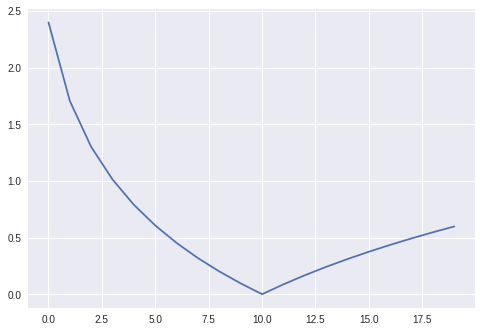

In [154]:
plt.plot(RMSLE)

例えば X軸の5と15の時のYを見ると明らかなように、  
大きい数字の時の誤差判定が甘くなっています。

今回は飲食店の来客数予測です。  
人数を少なく予測し、その分の食材を用意したときに、その食材が足りなくなる…、これは飲食店にとって最悪の事態です。  
それよりは予想を大きくし、食材を多めに用意する方がその重大なリスクを回避できます。  

ですので、今回はRMSLEが適していると考えられます。